In [ ]:
import cv2
import math
from itertools import combinations
from itertools import permutations
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving figure4.png to figure4.png


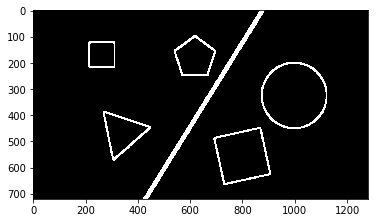

In [ ]:
images = ["figuras.png", "figures2.png", "figure3.png", "figure4.png"]
img = cv2.imread(images[0], 0);
img2 = cv2.imread(images[0], 0);

img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
cimg2 = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
edges = cv2.Canny(img,1,100)

edges = cv2.dilate(edges, None, iterations=3)
plt.imshow(edges, "gray");
plt.show()

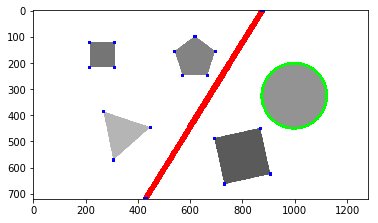

In [ ]:
# DETECT LINES
minLineLength = 500 # lines shorter than this are rejected
maxLineGap = 50

lines = cv2.HoughLinesP(edges,1,np.pi/180,img.shape[0],minLineLength,maxLineGap)
if lines is not None:
  for line in lines:
    for x1,y1,x2,y2 in line:
      cv2.line(cimg,(x1,y1),(x2,y2),(255,0,0),5)
      
# DETECT CIRCLES
circles = cv2.HoughCircles(img2,cv2.HOUGH_GRADIENT,1,100,param1=100,param2=35,minRadius=0,maxRadius=0)
if circles is not None:
  circles = np.uint16(np.around(circles))
  for i in circles[0,:]:
      cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),10)
    
# DETECT CORNERS
gray = np.float32(img2) # img2 is without blur
#gray = cv2.equalizeHist(img2)
dst = cv2.cornerHarris(gray,2,3, 0.04)
dst = cv2.dilate(dst,None, iterations=5)
cimg[dst>0.01*dst.max()]=[0,0,255]
corners = []
plt.imshow(cimg) 

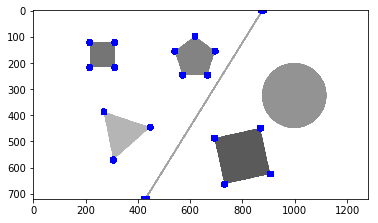

In [ ]:
maxim = dst.max()
corners = []

for i in range(cimg.shape[0]):
  for j in range(cimg.shape[1]):
    if cimg[i][j][2] == 255 and cimg[i][j][0] == 0 and cimg[i][j][1] == 0:
      corners.append(tuple([j, i]))

reduced = []
for i in range(len(corners)):
  x = corners[i][0]
  y = corners[i][1]
  if i == 0:
    reduced.append(tuple([x, y]))
    continue
  else:
    should = True
    for c in corners:
      if x == c[0] and y == c[1]:
        break
      if abs(x - c[0]) < 5 and abs(y - c[1]) < 5:
        should = False
        break
    if should == True:
      reduced.append(tuple([x, y]))
      
#print(len(reduced))
#print(reduced)

for i in range(len(corners)):
  cv2.circle(cimg2, corners[i], 2, (0,0,255), 10)
  
plt.imshow(cimg2)

0.9773517738934743


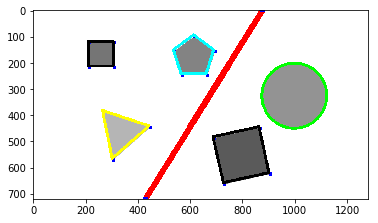

In [ ]:
squares = []
real_sq = []

triangles = []
real_triangles = []

pentagons = []
real_pent = []

eps_triangle = 3
eps = 3

def SQD(p1, p2):
  return (p1[0] - p2[0])**2 + (p1[1] - p2[1])**2

# COMBINATIONS 4,3,5
for comb in combinations(reduced, 4):
  temp = list(comb)
  squares.append(temp)
#print(squares)

for comb in combinations(reduced, 3):
  temp = list(comb)
  triangles.append(temp)
#print(triangles)

for comb in combinations(reduced, 5):
  temp = list(comb)
  pentagons.append(temp)
#print(pentagons)

pool = []

# DECIDE SQUARES
for p in squares:
  d2 = SQD(p[0], p[1])
  d3 = SQD(p[0], p[2])
  d4 = SQD(p[0], p[3])
  
  d2 = int(d2)
  d3 = int(d3)
  d4 = int(d4)
  
  if (abs(d2 - d3) <= eps and abs(2 * d2 - d4) <= eps):
    dist = SQD(p[1], p[3])
    dist34 = SQD(p[2], p[3])
    if(abs(dist - dist34) <= eps and abs(dist - d2) <= eps):
      real_sq.append(p)
      for i in range(4):
        pool.append(p[i])   
      continue
      
  if (abs(d3 - d4) <= eps and abs(2 * d3 - d2) <= eps):
    dist = SQD(p[1], p[2])
    dist34 = SQD(p[1], p[3])
    if(abs(dist - dist34) <= eps and abs(dist - d3) <= eps):
      real_sq.append(p)
      for i in range(4):
        pool.append(p[i])
      continue
      
  if (abs(d2 - d4) <= eps and abs(2 * d2 - d3) <= eps):
    dist = SQD(p[1], p[2])
    dist34 = SQD(p[2], p[3])
    if(abs(dist - dist34) <= eps and abs(dist - d2) <= eps):
      real_sq.append(p)
      for i in range(4):
        pool.append(p[i])
      continue
      
  centroid = [0.0, 0.0]
  for i in range(2):
    for j in range(4):
      centroid[i] += p[j][i]
  
  centroid[0] = centroid[0] / 4.0
  centroid[1] = centroid[1] / 4.0
  c = tuple(centroid)
  
  dc1 = math.sqrt(SQD(c, p[0]))
  dc2 = math.sqrt(SQD(c, p[1]))
  dc3 = math.sqrt(SQD(c, p[2]))
  dc4 = math.sqrt(SQD(c, p[3]))
  
  if abs(dc1 - dc2) <= eps and abs(dc1 - dc4) <= eps and abs(dc1 - dc3) <= eps and abs(math.sqrt(d2) - math.sqrt(d3)) <= eps:
    print(math.sqrt(d2) - math.sqrt(d3))
    real_sq.append(p)
    for i in range(4):
      pool.append(p[i])
    continue

for p in real_sq:
  if pool.count(p[0]) > 1  or pool.count(p[1]) > 1 or pool.count(p[2]) > 1 or pool.count(p[3]) > 1:
    continue
  cv2.line(cimg,(p[0][0],p[0][1]),(p[1][0],p[1][1]),(0,0,0),10)
  cv2.line(cimg,(p[1][0],p[1][1]),(p[3][0],p[3][1]),(0,0,0),10)
  cv2.line(cimg,(p[3][0],p[3][1]),(p[2][0],p[2][1]),(0,0,0),10)
  cv2.line(cimg,(p[2][0],p[2][1]),(p[0][0],p[0][1]),(0,0,0),10)
  
# DECIDE PENTAGONS
for p in pentagons:
  centroid = [0.0, 0.0]
  for i in range(2):
    for j in range(5):
      centroid[i] += p[j][i]
  
  centroid[0] = centroid[0] / 5.0
  centroid[1] = centroid[1] / 5.0
  c = tuple(centroid)
  
  dc1 = math.sqrt(SQD(c, p[0]))
  dc2 = math.sqrt(SQD(c, p[1]))
  dc3 = math.sqrt(SQD(c, p[2]))
  dc4 = math.sqrt(SQD(c, p[3]))
  dc5 = math.sqrt(SQD(c, p[4]))
  
  if abs(dc1 - dc2) <= eps and abs(dc1 - dc4) <= eps and abs(dc1 - dc3) <= eps and abs(dc1 - dc5)<= eps:
    real_pent.append(p)
    for i in range(5):
      pool.append(p[i])
    continue
    
for p in real_pent:
  cv2.line(cimg,(p[0][0],p[0][1]),(p[1][0],p[1][1]),(0,255,255),10)
  cv2.line(cimg,(p[1][0],p[1][1]),(p[3][0],p[3][1]),(0,255,255),10)
  cv2.line(cimg,(p[3][0],p[3][1]),(p[4][0],p[4][1]),(0,255,255),10)
  cv2.line(cimg,(p[4][0],p[4][1]),(p[2][0],p[2][1]),(0,255,255),10)
  cv2.line(cimg,(p[2][0],p[2][1]),(p[0][0],p[0][1]),(0,255,255),10)
  
# DECIDE TRIANGLES
for p in triangles:
  d2 = SQD(p[0], p[1])
  d3 = SQD(p[0], p[2])
  d4 = SQD(p[1], p[2])
  
  d2 = math.sqrt(d2)
  d3 = math.sqrt(d3)
  d4 = math.sqrt(d4)
  
  if(abs(d2 - d3) <= eps_triangle) and (abs(d4 - d3) <= eps_triangle):
    real_triangles.append(p)
    for i in range(3):
      pool.append(p[i])
    
#print(real_triangles)
#print(pool)

for p in real_triangles:
  if pool.count(p[0]) > 1  or pool.count(p[1]) > 1 or pool.count(p[2]) > 1:
    continue
  cv2.line(cimg,(p[0][0],p[0][1]),(p[1][0],p[1][1]),(255,255,0),10)
  cv2.line(cimg,(p[1][0],p[1][1]),(p[2][0],p[2][1]),(255,255,0),10)
  cv2.line(cimg,(p[2][0],p[2][1]),(p[0][0],p[0][1]),(255,255,0),10)
  
#print(real_sq)
plt.imshow(cimg)